# solve pH just CaCO3 in water

$\mathrm{CaCO_{3(s)}}=\mathrm{Ca^{2+}}+\mathrm{CO_3^{2-}}$

$K_{sp}=[\mathrm{Ca^{2+}}]\times[\mathrm{CO_3^{2-}}]=3.4e-9$

What will total CT be?  For every Ca that dissolves there is a corresponding CO3.  This CO3 might transform (to HCO3) but from mass balance you can't get more CT in solution than Ca in solution AND the ratio Ca:CO3 is always in correspondence with the Ksp value.  So maximum CT is $\sqrt{K_{sp}}$

note: this doesn't seem exactly right.  because although mass balance says as many C come off as Ca that come off .. the CO3 can turn into HCO3 ... but the ion product is only true for Ca:CO3.  Still it seems a good approximation.

So let's determine pH when CT=sqrt(Ksp).  First load the function.  (We'll use NaT=0).


In [51]:
function pH=pHfromCaTclosed(CaT,CT,NaT)

% equilibrium constants
Kw=10^-14; Ka1=10^-6.36; Ka2=10^-10.33; 

a=1;
b=2*CaT+Ka1+NaT;
c=2*CaT*Ka1+NaT*Ka1+Ka1*Ka2-CT*Ka1-Kw;
d=2*CaT*Ka1*Ka2+NaT*Ka1*Ka2-CT*Ka1*Ka2-Kw*Ka1;
e=-Kw*Ka1*Ka2;
t=roots([a b c d e]);


t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);


end

In [52]:
pH=pHfromCaTclosed(sqrt(3.4e-9),sqrt(3.4e-9),0)

pH = 9.7659


this is very close to https://lawr.ucdavis.edu/classes/ssc102/Section5.pdf

[link](https://lawr.ucdavis.edu/classes/ssc102/Section5.pdf) shows for case 3 a pH of 9.9 for just calcite in water.  no external source of CO2.

I could go through and solve those equations for the pH of case 3 but it seems that my simple way is pretty close.

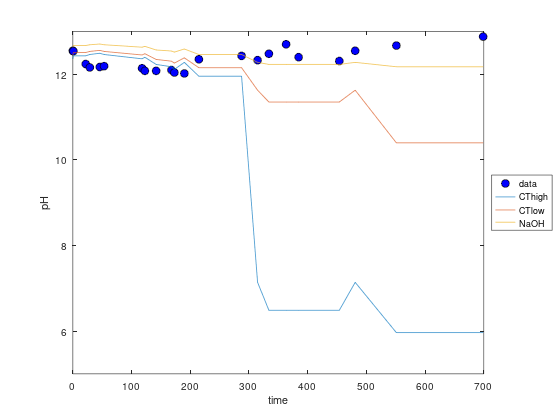

In [54]:
% look at actual data Ca in mol/L

time = [0.03, 1, 22, 29, 46, 53.33, 118, 122.75, 142, 168, 173, 190, 214.75, 287.5, 314.75, 334, 363.33, 384.66, 454, 481, 551.16, 699];  % Time in hours
pH_measured = [12.55, 12.54, 12.24, 12.16, 12.17, 12.19, 12.14, 12.08, 12.08, 12.1, 12.04, 12.02, 12.35, 12.43, 12.33, 12.48, 12.7, 12.4, 12.31, 12.55, 12.67, 12.88];  % Measured  pH values
Ca_measured = [0.015, 0.017, 0.017, 0.018, 0.019, 0.018, 0.015, 0.016, 0.012, 0.011, 0.010, 0.013, 0.008, 0.008, 0.003, 0.002, 0.002, 0.002, 0.002, 0.003, 0.001, 0.001];  % Measured Ca²⁺ (mol/L)
CThigh=0.007; CTlow=CThigh/4;

for i=1:length(time)
    pHmodelOPEN(i)=pHfromCaTclosed(Ca_measured(i),CThigh,0);
    pHmodelkindaclosed(i)=pHfromCaTclosed(Ca_measured(i),CTlow,0);
    pHmodelNaOH(i)=pHfromCaTclosed(Ca_measured(i),CThigh,2e-2);
end

plot(time,pH_measured,'ko','markerfacecolor','b',time,pHmodelOPEN,time,pHmodelkindaclosed,time,pHmodelNaOH)
legend('data','CThigh','CTlow','NaOH','location','eastoutside')
axis([0 700 5 13])
xlabel('time'); ylabel('pH')
